# Chapter 4
Welcome to chapter 4! Here I won't be taking too many notes as this chapter highly deals with the mathematics of ML, check out the chapter for all the notes!!!


## Linear Regression
Anywho, let's generate some linear looking data.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let's compute theta hat using the normal equation!

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add xTheta = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The acutall function used to generate the data is y = 4 + 3x + Gaussian noise

Let's see what we predicted...

In [4]:
print("Pred: ", theta_best)

Pred:  [[3.87970451]
 [3.37257052]]


Would've hopped it had been closer... let's try and make some predictions with Theta hat though!

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Prediction: ", y_predict)

Prediction:  [[ 3.87970451]
 [10.62484554]]


This doesn't tell use mutch... Let's plot it's predictions!

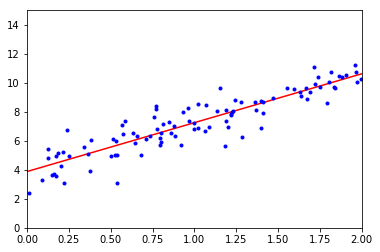

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent Scikit code is the following

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Intercept: ", lin_reg.intercept_)
print("Coeficient: ", lin_reg.coef_)

print("Our prediction: ", lin_reg.predict(X_new))

Intercept:  [3.87970451]
Coeficient:  [[3.37257052]]
Our prediction:  [[ 3.87970451]
 [10.62484554]]


## Computational Complexity
The Normal Equation computes the inverse of X^T * X, which is typically gives a runtime of O(n^2.4) to O(n^3). This means the Normal Equation gets very slow when the amount of features grow very large.

One the plus side the equation is linear in regards to the instances in the training set O(m), so it handels large training sets efficiently, provided they can fit in memory.

Another plus is once you trianed your model, it's predictions are very fast! Afterall, the computational complexity is linear.

## Gradient Descent
Problems is that we may end up stuck on the local minima!
When using gradient descent, make sure all of the features have the same scale!!!

### Batch Gradient Descent
This uses calculations over the whole trianing set at each Gradient Descent Step! It's the reason why it's called _Batch Gradient Descent_. As a result, it's terribly slow on very large trainging sets (We will see a much faster version shortly).

Here's a quick implementation

In [9]:
eta = 0.1  # Learining rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

Not to hard! Let's look at the resulting theta!

In [10]:
print("Theta: ", theta)

Theta:  [[3.87970451]
 [3.37257052]]


### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

At the extreme opposite, _Stochastic Gradient Descent_ just picks a random instance every step and computes the gradient based only on that single instance. This makes it much faster since it has much less data to manipulate every itteration. It makes it possible to train on HUGE datasets since only one instance needs to be in memory at each iterations (SDG can be implemented sa an out-of-core algorithm).

The problem with this algoritm is that it's much less regular and more random the Batch Gradient Descent. Instead of gently going down, it will bounce around a bit, and when it gets close to the minimum, it will continue to bounce around. You end up with good paramaters but not the best.

The bouncing can acutally help to find the local minima, but the bouncing make it not stay! One solution is to gradually reduce the learning rate. This process is called _simulated annealing_. The function that determinse the learning rate at each itteration is called the _learning schedual_.

The following code implements Stochastic Gradeint Descent.

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients